<a href="https://colab.research.google.com/github/Tatiana130197/statistical-workshop/blob/main/fourth_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 4

### Задание:
Домашним заданием является подготовка отчета для Министерства транспорта, раскрывающего природу и особенности задержек рейсов. Отчет должен помочь выявить проблемные области и способствовать принятию решений. Поэтому старайтесь не излагать общие факты, а показывать проблемы. Например, тот факт, что "средняя задержка вылета составляет 15 минут" сам по себе мало о чем говорит и не помогает понять, почему это происходит. Напротив, график, показывающий, что по понедельникам задержки увеличиваются втрое по сравнению с другими днями на фоне увеличения количества рейсов и пассажиров, наводит на мысль о возможной причине проблемы: аэропорты не справляются с неравномерной загрузкой.

Отчет должен быть оформлен в виде блокнота с четкой структурой. В начале ячейки Markdown есть краткое описание изучаемого вопроса (что мы будем изучать), затем код и все его выходные данные (таблицы, графики, значения), затем снова ячейка Markdown, в которой сформулирован ваш краткий вывод.

Отчет должен содержать не менее 5 результатов, подтвержденных графиками. Для разнообразия материала используйте различные типы диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, цветовая схема).

Для решения задач используйте методы библиотеки pandas.

Чтобы реализовать данное задания, я разобью решение на шаги

1. Подготовка данных
 - Загружаю базы данных.
 - Объединяю данные в одну таблицу.
 - Проверяю на наличие пропущенных значений и обрабатываю их.


2. Проведение анализа и визуализация, оформление отчета
 - Влияние дня недели на задержки.
 - Влияние праздничных дней на задержки.
 - Задержи по аэропортам.
 - Задержки по месяцам.
 - Зависимость задержек от авиакомпаний.

Критерии оформления отчета
 - Графики с понятными подписями.
 - Выводы после каждого анализа.



---

Решение:

### 1. Подготовка данных


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Загружаю базы данных.

In [2]:
airlines = pd.read_csv("/content/drive/MyDrive/python/airlines.csv")
airports = pd.read_csv("/content/drive/MyDrive/python/airports.csv")
flights = pd.read_csv("/content/drive/MyDrive/python/flights.csv")

<ipython-input-2-5761a7a0706b>:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("/content/drive/MyDrive/python/flights.csv")


Необходимо понять, какие столбы я имею, чтобы определить, какие из них будут использоваться в качестве ключей для слияния.

In [3]:
print(airlines.columns)
print(airports.columns)
print(flights.columns)

Index(['IATA_CODE', 'AIRLINE'], dtype='object')
Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


* Объединяю данные в одну таблицу.

In [23]:
merged_data = pd.merge(flights, airlines, left_on = 'AIRLINE', right_on = 'IATA_CODE', how = 'left')
merged_data = pd.merge(merged_data, airports, left_on = 'ORIGIN_AIRPORT', right_on = 'IATA_CODE', how = 'left')

#print(merged_data.head(10).to_string(index=False))

Проверим столько % данных отсутствует в каждом столбце.

In [5]:
missing_values = merged_data.isna().sum()
total_values = merged_data.shape[0]

percentage_missing = (missing_values / total_values) * 100

print(percentage_missing)

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE_x               0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

Видно, что данные достаточно полные, за исключением столбцов с причиной задержки рейса. Значит, эти данные недостаточны, их использовать не будем. Удалим эти столбцы.

In [6]:
print(merged_data.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_x', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IATA_CODE_x', 'AIRLINE_y',
       'IATA_CODE_y', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


In [7]:
columns_to_drop_na = [
    'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'
    ]

merged_data = merged_data.drop(columns=columns_to_drop_na)

#print(merged_data.tail(10).to_string(index=False))


Удаляем все пропущенные значения.

In [8]:
merged_data = merged_data.dropna()

### 2. Проведение анализа и визуализация

1. **Влияние дня недели на задержки.**

Стоит проанализировать, если в какой-то день наблюдается аномально большое количество задержек, это может указывать на перегрузку или неэффективное управление потоками рейсов. Такая информация поможет улучшить работу аэропортов.

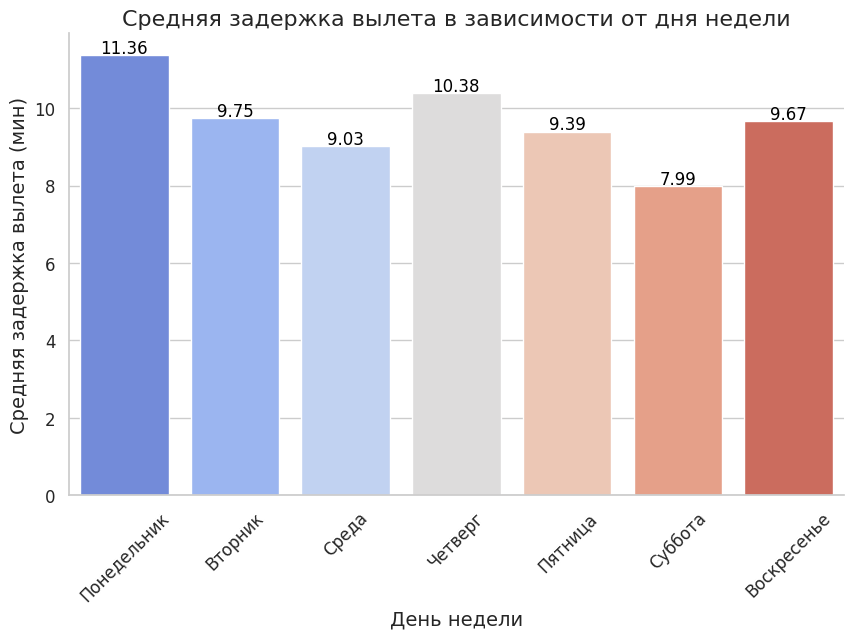

In [9]:
days_labels = {
    1: 'Понедельник', 2: 'Вторник', 3: 'Среда', 4: 'Четверг',
    5: 'Пятница', 6: 'Суббота', 7: 'Воскресенье'
}

weekly_delays = merged_data.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().reset_index()

full_week = pd.DataFrame({'DAY_OF_WEEK': range(1, 8)})
weekly_delays = full_week.merge(weekly_delays, on = 'DAY_OF_WEEK', how = 'left')

weekly_delays['DAY_OF_WEEK'] = weekly_delays['DAY_OF_WEEK'].map(days_labels)

sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))
ax = sns.barplot(data=weekly_delays, x = 'DAY_OF_WEEK', y = 'DEPARTURE_DELAY', hue = 'DAY_OF_WEEK', palette = 'coolwarm')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize = 12, color = 'black',
                xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('День недели', fontsize = 14)
plt.ylabel('Средняя задержка вылета (мин)', fontsize = 14)
plt.title('Средняя задержка вылета в зависимости от дня недели', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)

sns.despine()
plt.show()

Согласно гистограмме:

 - Наибольшие задержки наблюдаются в понедельник – это может указывать на высокую загрузку аэропортов в начале и середине рабочей недели.

 - Минимальные задержки происходят в среду и субботу – возможно, это связано с меньшим количеством рейсов и меньшей нагрузкой на инфраструктуру.

 - Относительно высокая задержка в пятницу и воскресенье может быть связана с увеличением пассажиропотока в конце недели.

Эти данные могут указывать на необходимость перераспределения рейсов или оптимизации управления потоками в наиболее загруженные дни (понедельник).

2. **Влияние праздничных дней на задержки.**

Следует проанализировать влияние праздничных дней на задержки, если пассажир решит экстренно слетать, например, на Новый год или другой праздник в Анапу.

In [10]:
import holidays # для праздников
from collections import Counter

In [11]:
year_counts = Counter(merged_data['YEAR'])
print(year_counts)

Counter({2015: 5226569})


In [12]:
russian_holidays = holidays.RU(years=2015)

merged_data_with_holidays = merged_data.copy()

merged_data_with_holidays['DATE'] = pd.to_datetime(
    merged_data_with_holidays['YEAR'].astype(str) + '-' +
    merged_data_with_holidays['MONTH'].astype(str).str.zfill(2) + '-' +
    merged_data_with_holidays['DAY'].astype(str).str.zfill(2),
    format='%Y-%m-%d'
)

merged_data_with_holidays['HOLIDAYS'] = merged_data_with_holidays['DATE'].dt.date.isin(russian_holidays.keys())

holiday_counts = Counter(merged_data_with_holidays['HOLIDAYS'])

print(merged_data_with_holidays[['DATE', 'HOLIDAYS']].head(10))
print()

print(f"Количество праздников: {holiday_counts[True]}")
print(f"Количество не праздников: {holiday_counts[False]}")

        DATE  HOLIDAYS
0 2015-01-01      True
1 2015-01-01      True
2 2015-01-01      True
3 2015-01-01      True
4 2015-01-01      True
5 2015-01-01      True
6 2015-01-01      True
7 2015-01-01      True
8 2015-01-01      True
9 2015-01-01      True

Количество праздников: 281455
Количество не праздников: 4945114


И как же праздники влияли на задержку рейса?

In [20]:
holidays_data = merged_data_with_holidays[merged_data_with_holidays['HOLIDAYS'] == True]
non_holidays_data = merged_data_with_holidays[merged_data_with_holidays['HOLIDAYS'] == False]

mean_departure_delay_holidays = holidays_data['DEPARTURE_DELAY'].mean()
mean_departure_delay_non_holidays = non_holidays_data['DEPARTURE_DELAY'].mean()

mean_arrival_delay_holidays = holidays_data['ARRIVAL_DELAY'].mean()
mean_arrival_delay_non_holidays = non_holidays_data['ARRIVAL_DELAY'].mean()

print(f"Средняя задержка по вылету в праздничные дни: {mean_departure_delay_holidays:.2f} минут")
print(f"Средняя задержка по вылету в непраздничные дни: {mean_departure_delay_non_holidays:.2f} минут")
print()

print(f"Средняя задержка по прибытию в праздничные дни: {mean_arrival_delay_holidays:.2f} минут")
print(f"Средняя задержка по прибытию в непраздничные дни: {mean_arrival_delay_non_holidays:.2f} минут")


Средняя задержка по вылету в праздничные дни: 13.94 минут
Средняя задержка по вылету в непраздничные дни: 9.46 минут

Средняя задержка по прибытию в праздничные дни: 10.47 минут
Средняя задержка по прибытию в непраздничные дни: 4.57 минут


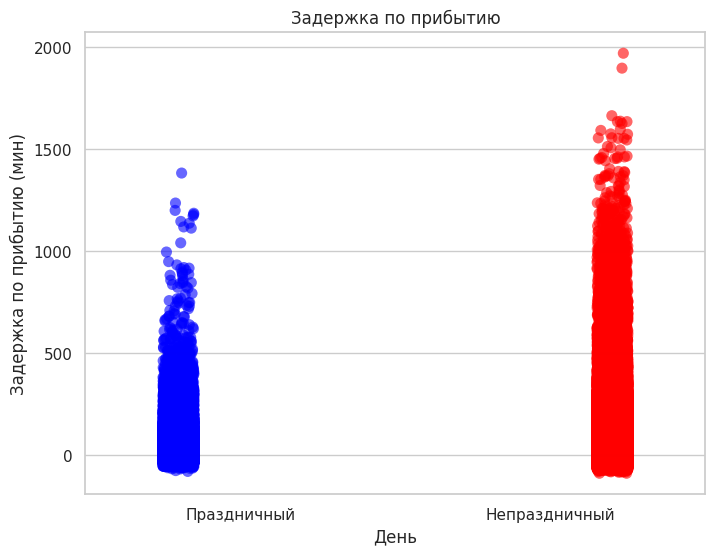

In [21]:
merged_data_with_holidays["HOLIDAY_LABEL"] = merged_data_with_holidays["HOLIDAYS"].map({True: "Праздничный", False: "Непраздничный"})
merged_data_with_holidays["ARRIVAL_DELAY"].describe()
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.stripplot(
    data=merged_data_with_holidays,
    x="HOLIDAY_LABEL",
    y="ARRIVAL_DELAY",
    hue="HOLIDAY_LABEL", dodge=True, jitter=True, alpha=0.6, size=8,
    edgecolor="black", palette={"Праздничный": "blue", "Непраздничный": "red"}
)

plt.xlabel("День")
plt.ylabel("Задержка по прибытию (мин)")
plt.title("Задержка по прибытию")
plt.show()

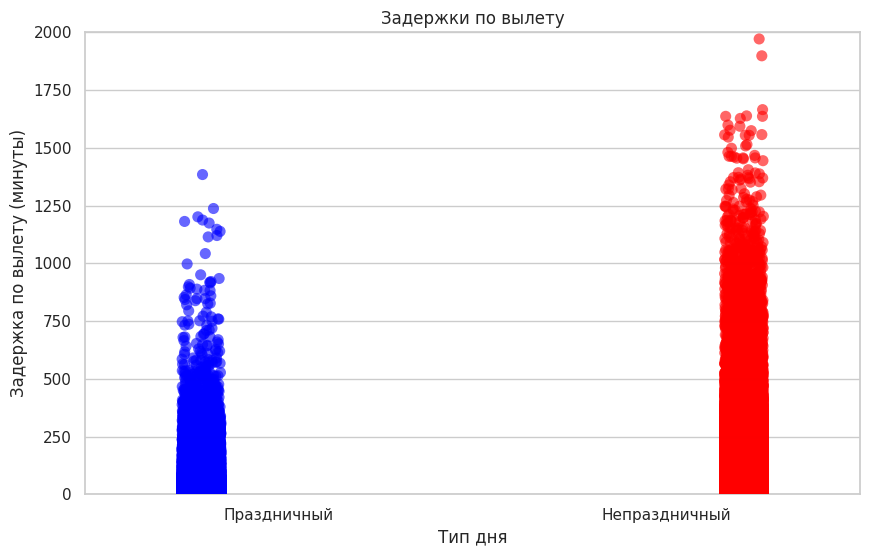

In [28]:
plt.figure(figsize=(10, 6))

sns.stripplot(
    data=merged_data_with_holidays,
    x="HOLIDAY_LABEL",
    y="ARRIVAL_DELAY",
    hue="HOLIDAY_LABEL",
    dodge=True,
    jitter=True,
    alpha=0.6,
    size=8,
    edgecolor="black",
    palette={"Праздничный": "blue", "Непраздничный": "red"}
)

plt.ylim(0, 2000)
plt.xlabel("Тип дня")
plt.ylabel("Задержка по вылету (минуты)")
plt.title("Задержки по вылету")

plt.show()

На основе представленных графиков можно сделать следующие выводы:

Общее распределение задержек
 - Большая часть задержек по вылету и прибытию составляет менее 100 минут.
 - Длинный правый хвост указывает на редкие, но значительные задержки, достигающие сотен и даже тысяч минут.

Влияние праздничных дней
 - В праздничные дни (синяя линия) задержек в целом меньше, чем в непраздничные (красная линия).
 - В непраздничные дни частота задержек выше, что может быть связано с более высокой загруженностью авиаперевозок.

Риск сильных задержек
 - Хотя в праздничные дни в целом задержки реже, присутствуют выбросы, означающие, что в редких случаях возможны значительные отклонения от графика.
 - В непраздничные дни риск задержек выше, но экстремальные случаи также встречаются.

Заключение: В праздники задержки менее часты, но полностью исключать их нельзя. В обычные дни вероятность задержки выше, вероятно, из-за большей нагрузки на аэропорты и авиакомпании.


Таким образом, экстренный вылет в Анапу на праздник, скорее всего, пройдет без значительных задержек, но небольшие риски все же остаются.

3. **Задержки по аэропортам.**

Нужно выяснить, в каком аэропорту задержек больше. Для меня, как пассажира, это полезно (выберу другой аэропорт), а для владельцев — шанс исправить проблемы в отстающем. Уверена, что работа над ошибками будет эффективнее, если владелец знает, что его аэропорт хуже всех.

In [22]:
arrival_delay_by_airport = merged_data.groupby('AIRPORT')['ARRIVAL_DELAY'].mean().reset_index()
arrival_delay_by_airport = arrival_delay_by_airport.sort_values(by='ARRIVAL_DELAY', ascending=False)

top_7_arrival_delay = arrival_delay_by_airport.head(7)

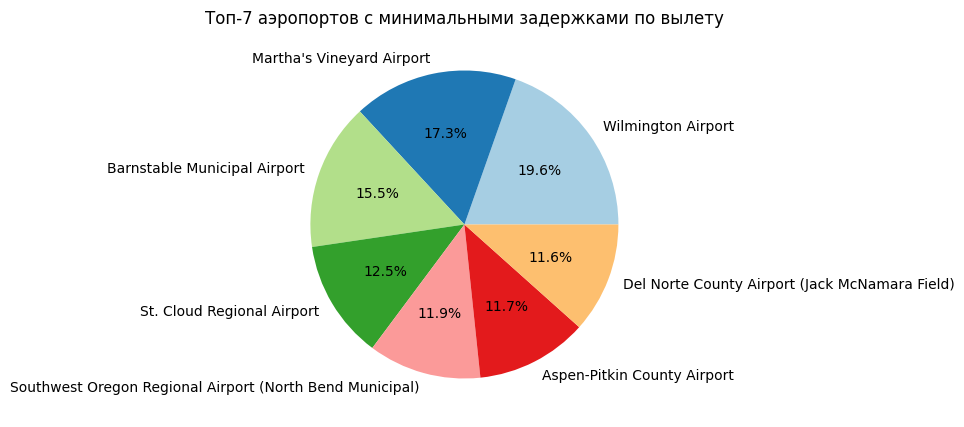

In [17]:
plt.figure(figsize=(5, 5))
plt.pie(
    top_7_departure_delay['DEPARTURE_DELAY'],
    labels = top_7_departure_delay['AIRPORT'],
    autopct = '%1.1f%%',
    colors = plt.cm.Paired.colors
)
plt.title('Топ-7 аэропортов с минимальными задержками по вылету')
plt.show()

Del Norte Country Airport демонстрирует наименьший процент задержек по вылету (11.7%), что делает его наиболее надежным для пассажиров, планирующих вылет.

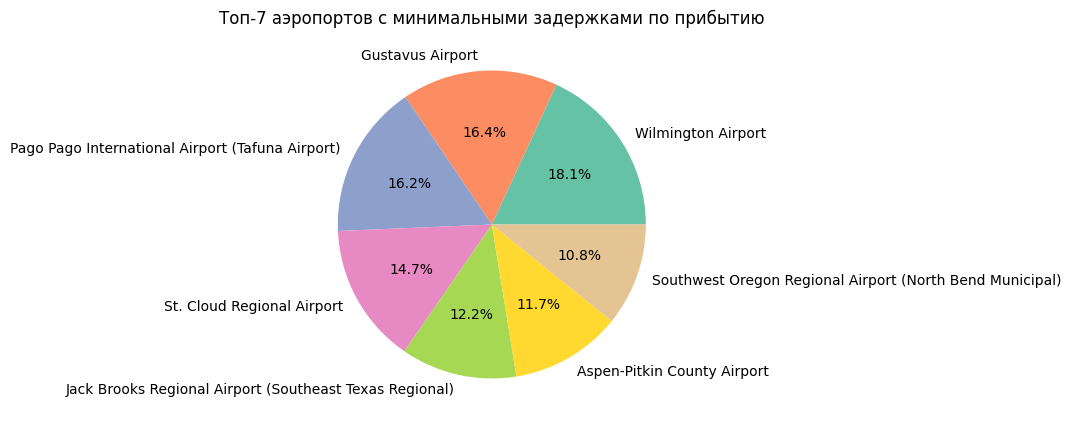

In [23]:
plt.figure(figsize=(5, 5))
plt.pie(
    top_7_arrival_delay['ARRIVAL_DELAY'],
    labels=top_7_arrival_delay['AIRPORT'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors
)
plt.title('Топ-7 аэропортов с минимальными задержками по прибытию')
plt.show()

Southwest Oregon Regional Airport показывает наименьший процент задержек по прибытию, что делает его предпочтительным выбором для пассажиров, желающих минимизировать время ожидания.


Рекомендации для пассажиров:

 - Для минимизации задержек при вылете рекомендуется выбирать аэропорты с низкими показателями задержек, такие как Aspen-Pitkin Country Airport и
Del Norte Country Airport.

 - Для минимизации задержек при прибытии предпочтительнее выбирать аэропортSouthwest Oregon Regional Airport.

Рекомендации для аэропортов:

 - Аэропорты с более высокими показателями задержек могут рассмотреть возможность улучшения операционной эффективности и управления для снижения задержек.

 - Регулярный мониторинг и анализ причин задержек помогут повысить эффективность работы аэропортов.

Таким образом, данные предоставляют полезную информацию для пассажиров и аэропортов, помогая минимизировать задержки и улучшить качество обслуживания.

4. **Задержки по месяцам**

Также полезно для планирования отпуска. Если знаешь, когда задержки чаще, есть шанс провести отпуск не в аэропорту.

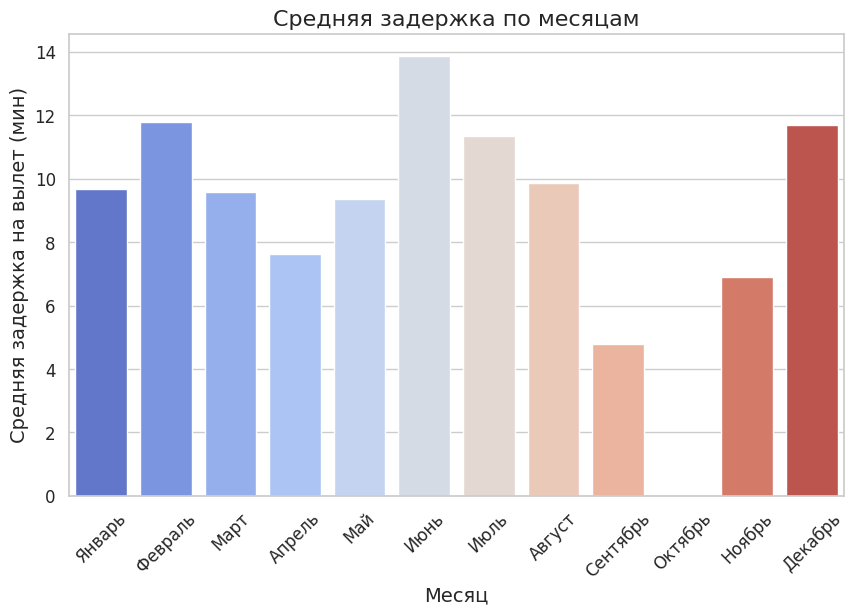

In [19]:
merged_data['MONTH'] = merged_data['MONTH'].astype(int)

monthly_delays = merged_data.groupby('MONTH')['DEPARTURE_DELAY'].mean().reset_index()

months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
monthly_delays['MONTH'] = monthly_delays['MONTH'].map(lambda x: months[x - 1])

all_months = pd.DataFrame({'MONTH': months})

full_monthly_delays = pd.merge(all_months, monthly_delays, on='MONTH', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(x = 'MONTH', y = 'DEPARTURE_DELAY', data = full_monthly_delays,
            hue = 'MONTH', palette = 'coolwarm', legend = False)
plt.title('Средняя задержка по месяцам', fontsize = 16)
plt.xlabel('Месяц', fontsize = 14)
plt.ylabel('Средняя задержка на вылет (мин)', fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Рекомендации:
 - Для планирования поездок с минимальными задержками рекомендуется выбирать летний, осенний сезоны.
 - Если поездка необходима в месяцы с высокими задержками, стоит учитывать возможные задержки и планировать дополнительное время для ожидания и пересадок.

5. **Зависимость задержек от авиакомпаний.**

> Это важно. Например, компания «Ред Вингс» постоянно задерживает рейсы! Не летайте с ними в Казахстан!



In [33]:
airline_delays = merged_data.groupby('AIRLINE_x').agg(
    avg_departure_delay = ('DEPARTURE_DELAY', 'mean'),
    avg_arrival_delay = ('ARRIVAL_DELAY', 'mean')
).reset_index()

airline_delays = airline_delays.sort_values(by='avg_departure_delay', ascending=False)

airline_delays = pd.merge(airline_delays, merged_data[['AIRLINE_x', 'AIRLINE_y']].drop_duplicates(),
                          on='AIRLINE_x', how='left')

Рассмотрим топ-7 авиакомпаний с наименьшими задержками, которые стоит выбирать для перелетов!

Теперь визуализируем эти данные на графике для более наглядного представления.

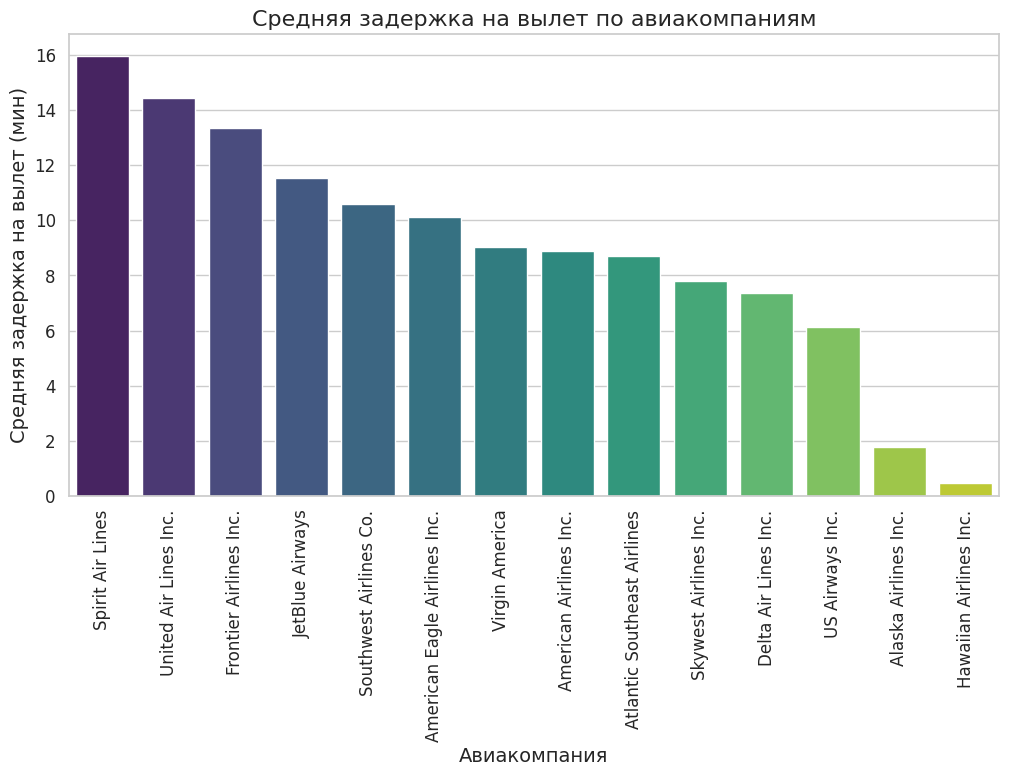

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=airline_delays, x='AIRLINE_y', y='avg_departure_delay', palette='viridis', hue='AIRLINE_y')
plt.title('Средняя задержка на вылет по авиакомпаниям', fontsize=16)
plt.xlabel('Авиакомпания', fontsize=14)
plt.ylabel('Средняя задержка на вылет (мин)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наименьшие задержки:
 - Hawaiian Airlines Inc. и Alaska Airlines Inc. демонстрируют самые низкие показатели задержек, что делает их наиболее надежными для пассажиров.


Наибольшие задержки:
 - Spirit Airlines и Frontier Airlines Inc. имеют самые высокие средние задержки, что может быть связано с их операционной моделью или другими факторами.

Рекомендации:
 - Для минимизации задержек рекомендуется выбирать авиакомпании с низкими показателями, такие как Hawaiian Airlines Inc. и Alaska Airlines Inc..

 - Пассажирам, летающим с авиакомпаниями с высокими задержками, стоит планировать дополнительное время для ожидания.
